# bank-customer-churn-prediction

Customers leaving BankCo (i.e. closing all accounts) are referred to as churn customers. Closing and reopening bank accounts is time consuming and customers who churn are usually unsatisfied with the service provided. As a result, churn customers are unlikely to return at any point in the future, and are likely to discourage new customers. It is fair to assume that the task of replacing churn customers is much more difficult than taking measures in advance to retain customers who are at risk of leaving. In order not to undermine the efforts of marketing, BankCo requires accurate models to predict which customers will churn.

## Objective
The goal of this project is to evaluate the use of machine learning algorithms in predicting whether customers are likely to churn in the future based on account information. An accurate model would allow BankCo to focus resources on incentivising potential churn customers to remain at the bank.

In [40]:
pip install numpy pandas matplotlib seaborn plotly sklearn opendatasets xgboost --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Let's check missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Column name 'RowNumber','CustomerID' and 'Surname' are of no use.

So we remove them.

In [4]:
df = df.drop(["Age","RowNumber", "CustomerId", "Surname"], axis = 1)

In [5]:
df.head(10)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,2,134603.88,1,1,1,71725.73,0


In [6]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

To give some context let us describe in words for each of the relevant variables what they represent:


1. **Surname:** customer surname - categorical variable permitted to be a string of letters

2. **CreditScore:** customer credit score - continuous numerical variable permitted to take values between 300 and 850

3. **Geography:** country registered on customer accounts - categorical variable permitted to be the name of any country where BankCo has braches

4. **Gender:** gender of customer - categorical variable pemitted to be one of two words, 'Male' or 'Female

5. **Age:** age of customer - discrete numerical variable permitted to be any positive integer less than a reasonable limit on the age of a human being

6. **Tenure:** number of years customer has been at BankCo - discrete numerical variable permitted to be any positive integer less than the age of the customer in question (or perhaps the age minus the minimum age to open an account)

7. **Balance:** overall balance across accounts held by a customer - continuous numerical variable permitted to be any number positive or negative with absolute value less than some reasonable maximum account balance (lets say one billion)

8. **NumOfProducts:** number of accounts/lines of credit registered to a customer - discrete numerical variable permitted to take any integer greater than 0 and less than some reasonable maximum number of accounts (lets say one thousand)

9. **HasCrCard:** indication of whether a customer has a credit card or not - categorical variable permitted to take values 1 or 0

10. **IsActiveMember:** indication of whether a customer is active or not - categorical variable permitted to take values 1 or 0

11. **EstimatedSalary:** estimation of customer annual salary - continuous numerical variable permitted to be any positive number less than some reasonable maximum salary (lets say one billion)

12. **Exited:** indication of whether a customer has churned or not - categorical variable permitted to take values 1 or 0

# Exploratory Data Analysis

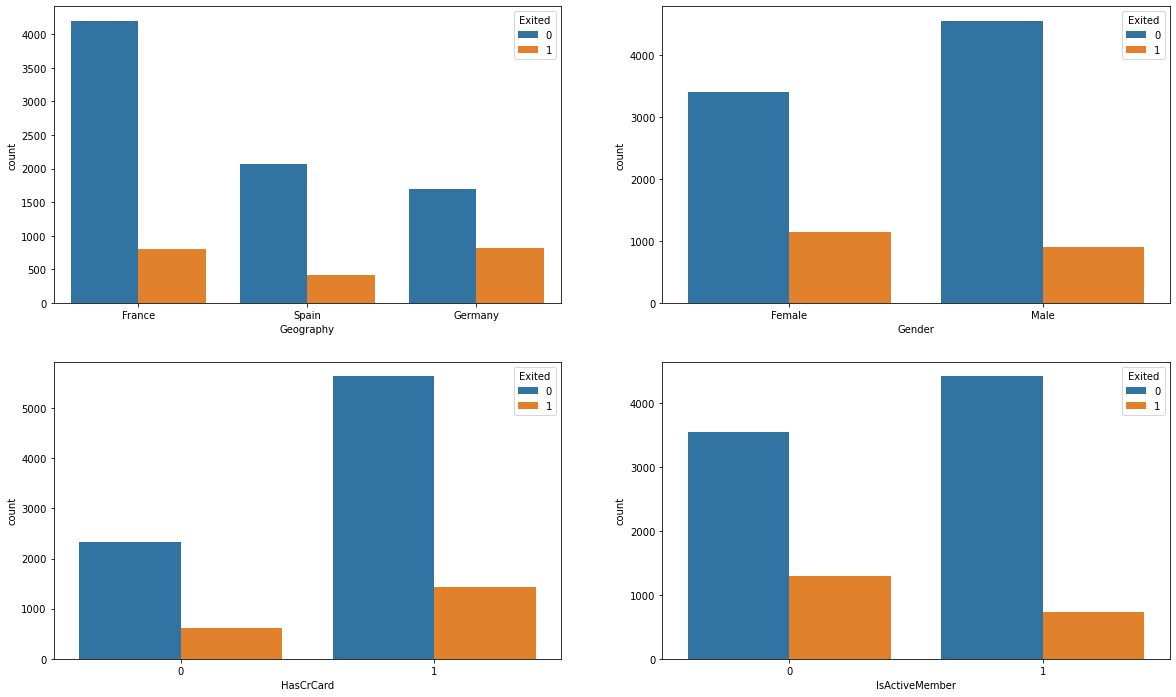

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

### Conclusions -

1. Number of customers exited is inversely proportion the the number of customers in the region. Eg. Germany has least number of customers but has highest rate of customers exit. This may be because enough resources was not alloted for the customers (in other words comparatively poor service the the customers compared to its competitors).

2. Proportion of female customers exiting the service is higher than that of male customers.

3. Inactive users have high chance of exiting the service compared to active users.

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Feature Engineering

In [8]:
# Divide the dataset into dependent and independent features
X = df.iloc[:,:-1]   # Independent features
y = df.iloc[:,-1]     # Dependent features

In [9]:
X

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,2,0.00,1,1,1,101348.88
1,608,Spain,Female,1,83807.86,1,0,1,112542.58
2,502,France,Female,8,159660.80,3,1,0,113931.57
3,699,France,Female,1,0.00,2,0,0,93826.63
4,850,Spain,Female,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,5,0.00,2,1,0,96270.64
9996,516,France,Male,10,57369.61,1,1,1,101699.77
9997,709,France,Female,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,3,75075.31,2,1,0,92888.52


In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [12]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [13]:
X = pd.concat([X,geography,gender], axis = 1)

In [14]:
X

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,2,0.00,1,1,1,101348.88,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,1,0
2,502,8,159660.80,3,1,0,113931.57,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,5,0.00,2,1,0,96270.64,0,0,1
9996,516,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,7,0.00,1,0,1,42085.58,0,0,0
9998,772,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
# Split the dataset in traning set and test set
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [17]:
print('No  = ',list(y_train).count(0))
print('Yes = ',list(y_train).count(1))

No  =  6368
Yes =  1632


True and false ratio of observation column ('Exited') is around 80:20 which means that the data is imbalanced and our model may not be able to predict the true cases.

Now, we try to balance the imbalanced data using following methods:
1. RandomUnderSampler
2. SMOTE

## 1. RandomUnderSampler

In [18]:
!pip install imbalanced-learn imblearn --quiet

In [19]:
from sklearn.metrics import DistanceMetric
from imblearn.under_sampling import RandomUnderSampler

In [20]:
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [37]:
X_train_1,y_train_1 = undersample.fit_resample(X_train,y_train)

In [38]:
print('No  = ',list(y_train_1).count(0))
print('Yes = ',list(y_train_1).count(1))

No  =  3264
Yes =  1632


The training dataset is now quite balanced and now we can use this dataset to train our model.

In [23]:
# Scaling the numerical features
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
X_train_1 = sc.fit_transform(X_train)
X_test_1 = sc.transform(X_test)

In [32]:
X_train_1

array([[ 0.16958176,  0.00666099, -1.21571749, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945, -1.37744033, -0.00631193, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -1.031415  ,  0.57993469, ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 ,  0.00666099,  1.36147352, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521,  1.39076231, -1.21571749, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079, -1.37744033,  0.5113635 , ...,  1.75486502,
        -0.57369368, -1.09168714]])

### Model training

    1. RandomForestClassifier
    2. XGBClassifier

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

#### Random forest classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RandFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RandFor_grid.fit(X_train_1,y_train_1)
best_model(RandFor_grid)

0.8313750000000001
{'max_depth': 7, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(max_depth=7, max_features=8, min_samples_split=3)


In [53]:
y_pred_rf = RandFor_grid.predict(X_test)
y_pred_rf = (y_pred_rf >= 0.5)

In [54]:
cf_rf = confusion_matrix(y_test,y_pred_rf)
cf_rf

array([[1510,   85],
       [ 249,  156]])

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1595
           1       0.65      0.39      0.48       405

    accuracy                           0.83      2000
   macro avg       0.75      0.67      0.69      2000
weighted avg       0.82      0.83      0.82      2000



#### XGBoost classifier

In [56]:
from xgboost import XGBClassifier

In [58]:
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train_1,y_train_1)
best_model(xgb_grid)

0.765318421546351
{'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [59]:
y_pred_xgb = xgb_grid.predict(X_test)
y_pred_xgb = (y_pred_xgb >= 0.5)

In [60]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1595
           1       0.53      0.54      0.54       405

    accuracy                           0.81      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.81      0.81      0.81      2000



In [61]:
cf_xgb = confusion_matrix(y_test,y_pred_xgb)
cf_xgb

array([[1403,  192],
       [ 186,  219]])

Out of all models used above, XGBoost algorithm gave the best result.

So, we will use XGBoost model in later parts.

## 2. SMOTE Technique

In [62]:
from imblearn.over_sampling import SMOTE

In [64]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_2, y_train_2 = smote.fit_resample(X_train, y_train)

In [67]:
print('No  = ',list(y_train_2).count(0))
print('Yes = ',list(y_train_2).count(1))

No  =  6368
Yes =  6368


In [95]:
param_grid = {'max_depth': [2,3,5,6], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid_2 = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid_2.fit(X_train_2,y_train_2)
best_model(xgb_grid_2)

0.8110162231060768
{'gamma': 0.01, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [99]:
y_pred_xgb_2 = xgb_grid_2.predict(X_test)
y_pred_xgb_2 = (y_pred_xgb_2 >= 0.5)

In [100]:
print(classification_report(y_test, y_pred_xgb_2))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85      1595
           1       0.44      0.61      0.51       405

    accuracy                           0.77      2000
   macro avg       0.67      0.71      0.68      2000
weighted avg       0.80      0.77      0.78      2000



In [101]:
cf_xgb_2 = confusion_matrix(y_test,y_pred_xgb_2)
cf_xgb_2

array([[1282,  313],
       [ 156,  249]])

SMOTE technique has slightly improved the prediction of test dataset.

## AUPRC matrix

Since the data is skewed (80:20), we use the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC). AUPRC will “focus” on how the model handles the positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low.

In [170]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

In [178]:
weights = (y_train == 0).sum() / (1.0 * (y_train == 1).sum())
model = XGBClassifier(max_depth = 3, scale_pos_weight = weights,
                n_jobs = -1)
probabilities = model.fit(X_train,y_train, eval_set=[(X_test, y_test)], eval_metric='aucpr', early_stopping_rounds=20).predict_proba(X_test)
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

[0]	validation_0-aucpr:0.49441
[1]	validation_0-aucpr:0.53475
[2]	validation_0-aucpr:0.53516
[3]	validation_0-aucpr:0.55166
[4]	validation_0-aucpr:0.56262
[5]	validation_0-aucpr:0.55988
[6]	validation_0-aucpr:0.56244
[7]	validation_0-aucpr:0.56090
[8]	validation_0-aucpr:0.56063
[9]	validation_0-aucpr:0.56162
[10]	validation_0-aucpr:0.56317
[11]	validation_0-aucpr:0.56336
[12]	validation_0-aucpr:0.56301
[13]	validation_0-aucpr:0.56278
[14]	validation_0-aucpr:0.56057
[15]	validation_0-aucpr:0.55945
[16]	validation_0-aucpr:0.55817
[17]	validation_0-aucpr:0.55795
[18]	validation_0-aucpr:0.56170
[19]	validation_0-aucpr:0.55980
[20]	validation_0-aucpr:0.55975
[21]	validation_0-aucpr:0.56042
[22]	validation_0-aucpr:0.56110
[23]	validation_0-aucpr:0.56165
[24]	validation_0-aucpr:0.56117
[25]	validation_0-aucpr:0.57015
[26]	validation_0-aucpr:0.57450
[27]	validation_0-aucpr:0.57230
[28]	validation_0-aucpr:0.57125
[29]	validation_0-aucpr:0.57200
[30]	validation_0-aucpr:0.57308


/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-aucpr:0.57360
[32]	validation_0-aucpr:0.57286
[33]	validation_0-aucpr:0.57305
[34]	validation_0-aucpr:0.57264
[35]	validation_0-aucpr:0.57323
[36]	validation_0-aucpr:0.57357
[37]	validation_0-aucpr:0.57284
[38]	validation_0-aucpr:0.57111
[39]	validation_0-aucpr:0.57130
[40]	validation_0-aucpr:0.57080
[41]	validation_0-aucpr:0.57045
[42]	validation_0-aucpr:0.57077
[43]	validation_0-aucpr:0.56969
[44]	validation_0-aucpr:0.57025
[45]	validation_0-aucpr:0.56958
AUPRC = 0.5749071489904858


In [179]:
y_preds = model.predict(X_test)

In [180]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1595
           1       0.42      0.74      0.54       405

    accuracy                           0.74      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.82      0.74      0.76      2000



In [181]:
cf = confusion_matrix(y_test,y_preds)
cf

array([[1182,  413],
       [ 106,  299]])

# Conclusion:

1. From the results above, my main goal is to predict which customers are likely to churn so that they can be put into some sort of churn prevention scheme. 

2. The data we had only 20% churns, so it was an imbalanced data. So, balancing was necessary before training the model.

3. First technique we used was RandomUnderSampler. The data was balanced by deleting negative rows such that the ratio of negative to positive output was 0.5. Then we compared RandomForestClassifier and XGBoostClassifier model fine-tuned using GridSearchCV. Highest score achieved using XGBoostClassifier.

3. We also used AUPRC matrix for evaluation of model without balancing the data and use XGBoostClassifier during training.

4. We achieved maximum Precision of 93% and recall of 78%. that means the model was able to catch 78% of the actual Churn cases. This is the measure we really care about, because we want to miss as few of the true Churn cases as possible.

4. A high recall model can help the bank to effectively identify the actual churning customers.